ThoraricSurgery.csv
- 폴란드 브로츠와프 의과대학에서 2013년 공개한 폐암 수술 환자의  
 수술 전 진단 데이터와 수술 후 생존 결과를 기록한 실제 의료 기록 데이터
 
 
 
- 1~17 : 종양의 유형, 폐활량, 호흡관란여부, 고통정도, 기침, 흡연, 천식 여부 등
- 18: 수술 후 생존 결과(1: 생존, 0: 사망)

In [1]:
!git clone https://github.com/zzhining/deeplearning_class.git

Cloning into 'deeplearning_class'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (300/300), done.
remote: Compressing objects: 100% (289/289), done.
remote: Total 300 (delta 13), reused 293 (delta 9), pack-reused 0
Receiving objects: 100% (300/300), 2.19 MiB | 2.05 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [3]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)

## 1.  데이터 읽어오기

In [3]:
# 준비된 수술 환자 데이터를 불러들입니다.
Data_set = np.loadtxt("/content/deeplearning_class/dataset/ThoraricSurgery.csv", delimiter=",")
Data_set

array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

In [4]:
# 데이터프레임으로 읽어오기

# import pandas as pd
# Data_set = pd.read_csv("../dataset/ThoraricSurgery.csv", header = None)
# dataArray = Data_set.values
# X = dataArray[:,0:17].astype(float)
# Y = dataArray[:,17].astype(float)

## 2.  데이터 전처리

In [5]:
# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장합니다.
X = Data_set[:,0:17]
Y = Data_set[:,17]
X

array([[293.  ,   1.  ,   3.8 , ...,   1.  ,   0.  ,  62.  ],
       [  1.  ,   2.  ,   2.88, ...,   1.  ,   0.  ,  60.  ],
       [  8.  ,   2.  ,   3.19, ...,   1.  ,   0.  ,  66.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,   0.  ,  62.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,   0.  ,  58.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,   0.  ,  49.  ]])

## 3. 모델 설계

In [6]:
# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
model = Sequential()

# 입력데이터 17개의 값을 받아 은닉층 30개 노드로 보낸다
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## 4. 모델 컴파일

In [7]:
# 딥러닝을 실행합니다.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

## 5. 학습

In [8]:
# epoch= 100: 샘플이 처음부터 끝까지 100번 재사용될 때까지 실행을 반복
# batch_size = 10: 전체 470개 샘플을 10개씩 끊어서 집어넣기
h = model.fit(X, Y, epochs=100, batch_size=10)

Epoch 1/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1485 - accuracy: 0.8426
Epoch 2/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1402 - accuracy: 0.8511
Epoch 3/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1433 - accuracy: 0.8489
Epoch 4/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1396 - accuracy: 0.8511
Epoch 5/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1386 - accuracy: 0.8468
Epoch 6/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1405 - accuracy: 0.8511
Epoch 7/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.8489
Epoch 8/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1383 - accuracy: 0.8511
Epoch 9/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1377 - accuracy: 0.8511
Epoch 10/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1327 - accuracy: 0.8489
Epoch 11/

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


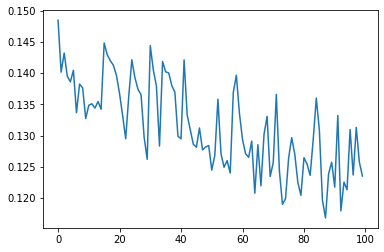

In [10]:
plt.plot(h.history['loss'])
plt.show()

In [12]:
h.history['accuracy'][-1]

0.8531914949417114